<h1 style="text-align:center;color:red">Import library</h1>

In [1]:
#importing library for web scraping

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import matplotlib.pyplot as plt

<h2 style="text-align:center;color:green">Reading Url</h2>

In [13]:
# reading the url

httpObject=urlopen("https://www.flipkart.com/search?q=best+laptops+under+Rs+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")
webdata=httpObject.read()

# print(webdata)

<h2 style="text-align:center;color:green">Prettify webdata</h2>

In [3]:
soupdata=soup(webdata)  # like str(738437)
type(soup(webdata))
print(soupdata)

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.493c50.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-to

In [4]:
# dir(soupdata) 

#like i="hello world" 
#     dir(i)

<h2 style="text-align:center;color:green">Find a comman container</h2>

In [5]:
containers=soupdata.findAll('div',{"class":"_2kHMtA"})   # type(container) === It is as list 
print(len(containers),type(containers))

24 <class 'bs4.element.ResultSet'>


In [6]:
containers[0] # only give first container data 

<div class="_2kHMtA"><a class="_1fQZEK" href="/hp-core-i3-11th-gen-8-gb-512-gb-ssd-windows-10-home-14s-dq2606tu-thin-light-laptop/p/itm0b19e546c47d9?pid=COMGCGSTN9R4WPQV&amp;lid=LSTCOMGCGSTN9R4WPQV76TNJK&amp;marketplace=FLIPKART&amp;q=best+laptops+under+Rs+50000&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=1d3d5c1a-f419-4be8-bfda-55a05a8f6ca9.COMGCGSTN9R4WPQV.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=jqc4ltzdsg0000001658033305962&amp;qH=c5191ad76aa4db6a" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows 10 Home) 14s-dq2606tu Thin and Light Laptop" class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/312/312/l0zm64w0/computer/k/h/m/14s-dq2606tu-thin-and-light-laptop-hp-original-imagcnsfnrzvzbs6.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span clas

In [7]:
# containers[24]

<h2 style="text-align:center;color:green">Useful data scrrap from URL</h2>

In [8]:
f=open('laptop.csv','wb')
f.write("ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n".encode())
for container in containers:
    # productname
    product=container.find('div',{'class':'_4rR01T'})
    ProductName=product.text.split('-')[0].strip()     # like (str.split(','))

    # star rating 
    star=container.find('div',{'class':'_3LWZlK'})
    try:
        Stars=star.text
    except:
        Stars=0

    # rating & reviews
    Rating=container.find("span",{'class':'_2_R_DZ'})
    try:
        ratRev=re.findall('\d+,?\d*',Rating.text)    # \d  for integer ,+ for 1 and more occurence ,? 0 or more occurence,* 0 or more
        Ratings=ratRev[0].replace(",","")
        Reviews=ratRev[1].replace(",","")
    except:
        Ratings=0
        Reviews=0
      
    # current price
    CurrentPrice=container.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace(",","")
    
    # mrp
    mrp=container.find('div',{'class':'_3I9_wc _27UcVY'})
    try:
        MRP=mrp.text.replace(",","")
    except:
        MRP=0

    #decription info
    Info=container.findAll('li','rgWa7D')
    if (Info[0].text.endswith(')')|Info[0].text.endswith('Processor')):
        Processor=Info[0].text
        RAM=Info[1].text
        Storage=Info[3].text
    else:
        Processor=Info[1].text
        RAM=Info[2].text
        Storage=Info[4].text
   
    
    # image url
    Image=container.img
    ImageURL=Image.get('src')
    
    print(ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
    print('\n')
f.close()


HP Core i3 11th Gen 4.4 141 15 ₹40900 ₹52900 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l0zm64w0/computer/k/h/m/14s-dq2606tu-thin-and-light-laptop-hp-original-imagcnsfnrzvzbs6.jpeg?q=70


Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U 4.3 502 61 ₹45000 ₹68490 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/keaaavk0/computer/x/m/y/lenovo-na-laptop-original-imafuzt8r5jqppfn.jpeg?q=70


ASUS VivoBook 15 (2022) Core i5 11th Gen 4.3 1669 168 ₹48990 ₹72990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/kp2y2kw0/computer/y/0/c/na-thin-and-light-laptop-asus-original-imag3ebnzawky4kn.jpeg?q=70


ASUS ROG Zephyrus G14 Ryzen 7 Octa Core 4800HS 4.5 272 28 ₹73990 ₹123990 AMD Ryzen 7 Octa Core Processor 8 GB LPDDR4X RAM 1 TB SSD https://rukminim1.flixcart.com/image/312/312/ku4ezrk0/computer/6/p/p/na-thin-and-light-laptop-asus

<h1 style="text-align:center;color:red">Show data using dataframe</h1>

In [9]:
datainfo=pd.read_csv("laptop.csv")
datainfo

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,HP Core i3 11th Gen,4.4,141,15,₹40900,₹52900,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
1,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,4.3,502,61,₹45000,₹68490,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook 15 (2022) Core i5 11th Gen,4.3,1669,168,₹48990,₹72990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
3,ASUS ROG Zephyrus G14 Ryzen 7 Octa Core 4800HS,4.5,272,28,₹73990,₹123990,AMD Ryzen 7 Octa Core Processor,8 GB LPDDR4X RAM,1 TB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,acer Aspire 3 Core i5 11th Gen,0.0,0,0,₹44490,₹57999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/l...
5,HP Ryzen 5 Hexa Core 5500U,4.4,637,72,₹46990,₹57042,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
6,HP Ryzen 5 Hexa Core 5500U,4.4,251,30,₹46990,₹60959,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
7,ASUS TUF Gaming F15 Core i5 10th Gen,4.5,4435,495,₹56990,₹74990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
8,DELL Inspiron Core i3 11th Gen,4.3,1082,138,₹45490,₹59389,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
9,DELL Inspiron Core i3 11th Gen,4.3,357,31,₹46490,₹60371,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


<h2 style="text-align:center;color:green">Bar chart in horizontal form</h2>

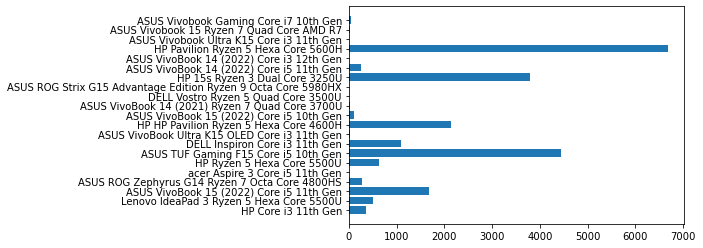

In [10]:
plt.barh(y=datainfo["ProductName"],width=datainfo["Ratings"])
# plt.xticks(rotation=90)
plt.show()

<h2 style="text-align:center;color:green">Bar chart in vertical form</h2>

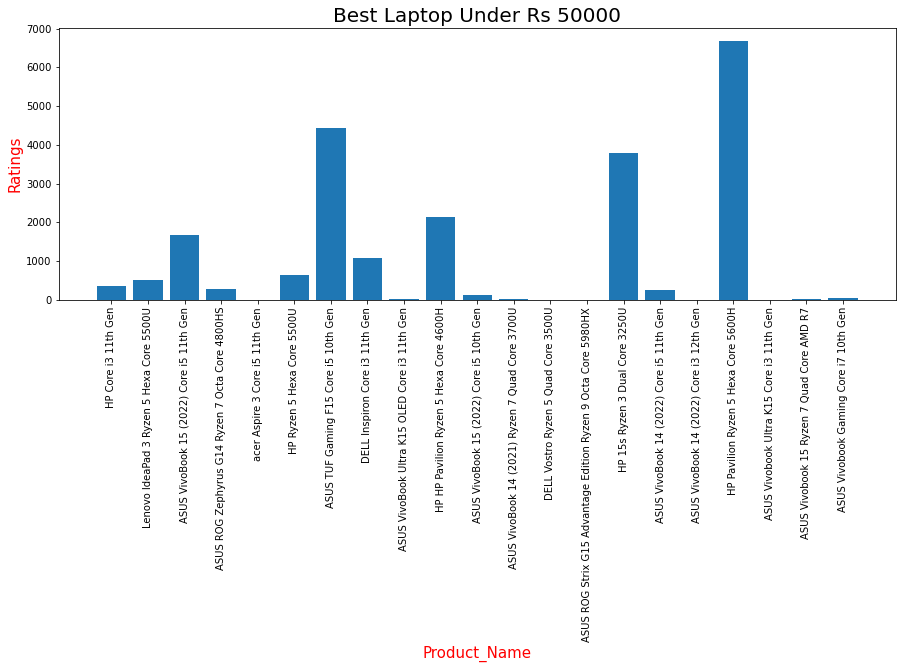

In [11]:
plt.figure(figsize=(15,5))
plt.bar(x=datainfo["ProductName"],height=datainfo["Ratings"])
plt.title("Best Laptop Under Rs 50000",fontsize=20)
plt.xlabel("Product_Name",fontsize=15,color="red")
plt.ylabel("Ratings",fontsize=15,color="red")
plt.xticks(rotation=90)
plt.savefig("rat&product.jpg")
plt.show()

In [12]:
datainfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   24 non-null     object 
 1   Stars         24 non-null     float64
 2   Ratings       24 non-null     int64  
 3   Reviews       24 non-null     int64  
 4   CurrentPrice  24 non-null     object 
 5   MRP           24 non-null     object 
 6   Processor     24 non-null     object 
 7   RAM           24 non-null     object 
 8   Storage       24 non-null     object 
 9   ImageURL      24 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.0+ KB
